# Clustering 예제2
###  K-means Clustering

### 라이브러리 불러오기

In [29]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

sns.set_style('white')

### 데이터 불러오기 및 데이터 분할(X/Y)

In [30]:
data = pd.read_csv("BreastCancerWisconsin.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

X = data.drop(['diagnosis'], axis=1)
X = X.iloc[:, :10]
y = data['diagnosis']

- Data has 569 rows and 31 columns.
- Column names:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


## K-means Clustering 모델링
### Hierarchical clustering과 달리 사전에 euclidean 으로 정의됨
#### >> 다른 distance를 사용하기 위해서는 직접 구현 필요

In [31]:
n_clusters = 2
km = KMeans(n_clusters=n_clusters, random_state=20190420)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=20190420, tol=0.0001, verbose=0)

In [33]:
labels_km = km.predict(X)
labels_km

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

### 군집결과 시각화

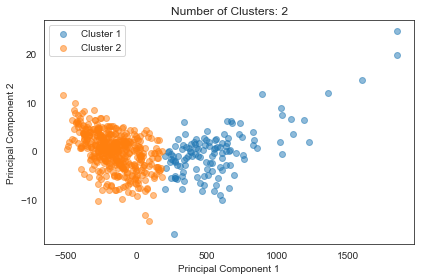

In [34]:
pca = PCA(n_components=2)
Z = pca.fit_transform(X)
plt.figure(1)
for i in range(max(labels_km) + 1):
    plt.scatter(Z[labels_km == i, 0], Z[labels_km == i, 1],
                label='Cluster {}'.format(i + 1), alpha=.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Number of Clusters: {}'.format(n_clusters))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Silhouette scores 산출

In [35]:
silhouette_avg = silhouette_score(X, labels_km)
print("For n_clusters =", n_clusters,
      "| The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 | The average silhouette_score is : 0.6991355163262034


#### sample 별 score 산출

In [38]:
sample_silhouette_values = silhouette_samples(X, labels_km)
pd.DataFrame(sample_silhouette_values).head(10)

,0
0,0.507247
1,0.691260
2,0.702179
3,0.817603
4,0.699275
5,0.832245
6,0.574781
7,0.777420
8,0.819181
9,0.831908


#### 군집별 silhouette scores을 통한 검정

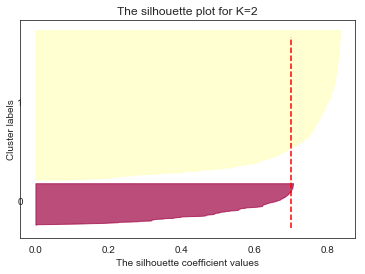

In [39]:
plt.figure(2)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels_km == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.Spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.vlines(x=silhouette_avg, ymin=0, ymax=X.shape[0], color="red", linestyle="--")
plt.title("The silhouette plot for K={}".format(n_clusters))
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster labels")
plt.yticks([])
plt.show()


## [TIP] K에 따른 silhouette 을 통해 데이터에 적합한 최적의 K를 찾을 수 있음

### 최적의 K 산출

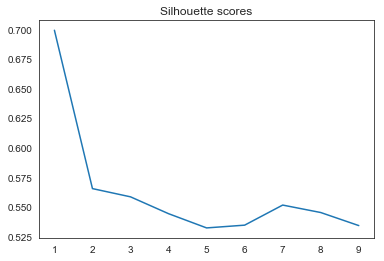

In [41]:
sil_scores = []
list_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in list_n_clusters:
    km = KMeans(n_clusters=n_clusters)
    labels_km = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels_km))

plt.figure(3)
plt.plot(range(1, len(sil_scores) + 1), sil_scores)
plt.title('Silhouette scores')
plt.show()